Epoch 0, Loss: 121.3004
Epoch 100, Loss: 0.3788
Epoch 200, Loss: 0.2968
Epoch 300, Loss: 0.2815
Epoch 400, Loss: 0.2792
Epoch 500, Loss: 0.2739
Epoch 600, Loss: 0.2757
Epoch 700, Loss: 0.2661
Epoch 800, Loss: 0.2703
Epoch 900, Loss: 0.2703


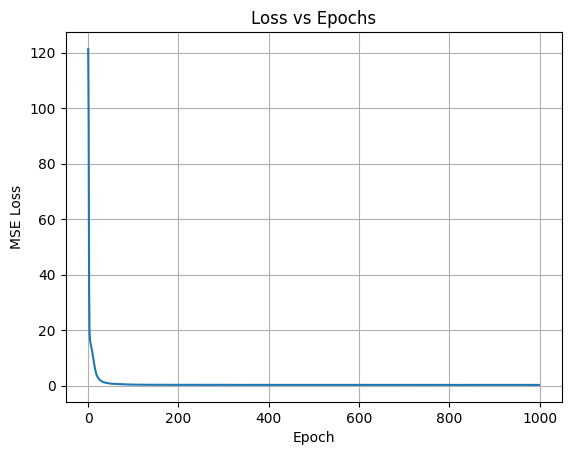

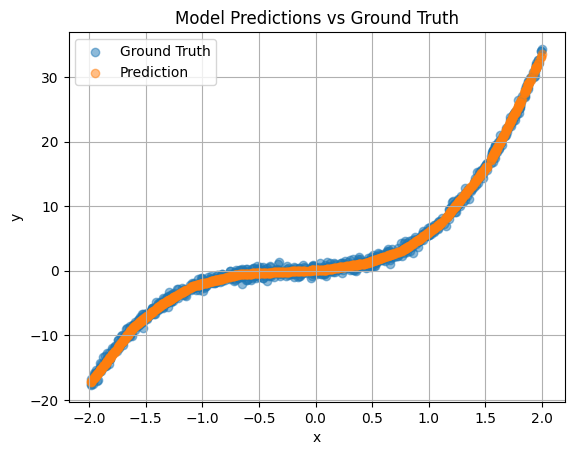

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import Dense, ReLU, MSELoss, SGD

np.random.seed(42)
X = np.random.uniform(-2, 2, (1000, 1))
y = 3 * X**3 + 2 * X**2 + X + np.random.normal(0, 0.5, (1000, 1))

layer1 = Dense(1, 64)
activation1 = ReLU()
layer2 = Dense(64, 1)

loss_fn = MSELoss()
optimizer = SGD([layer1, layer2], lr=0.01)

epochs = 1000
batch_size = 64
losses = []

for epoch in range(epochs):
    permutation = np.random.permutation(X.shape[0])
    X_shuffled = X[permutation]
    y_shuffled = y[permutation]
    epoch_loss = 0

    for i in range(0, X.shape[0], batch_size):
        xb = X_shuffled[i:i + batch_size]
        yb = y_shuffled[i:i + batch_size]

        out = layer1.forward(xb)
        out = activation1.forward(out)
        out = layer2.forward(out)

        loss = loss_fn.forward(out, yb)
        epoch_loss += loss

        grad = loss_fn.backward()
        grad = layer2.backward(grad)
        grad = activation1.backward(grad)
        grad = layer1.backward(grad)

        optimizer.step()

    losses.append(epoch_loss / (X.shape[0] // batch_size))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {losses[-1]:.4f}")

plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

y_pred = layer2.forward(activation1.forward(layer1.forward(X)))
plt.scatter(X, y, label="Ground Truth", alpha=0.5)
plt.scatter(X, y_pred, label="Prediction", alpha=0.5)
plt.legend()
plt.title("Model Predictions vs Ground Truth")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()